<a href="https://colab.research.google.com/github/Thanatipz/BSC_DPDM23/blob/main/Classification_proj_DPDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import association_rules

In [2]:
# pip install --upgrade ipykernel

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
survey = pd.read_excel('/content/drive/MyDrive/Final BSC2-67/dataset_consumer-insight-survey2019.xlsx')

# Clean data

In [5]:
dirty_data = survey.copy()
dirty_data

,id,a1,a2,a301,a302,a3021,a4,a5,a51,a52,...,u19new,r20new,s20new,t20new,u20new,G_genZ,G_genY,G_genX,G_genB,Gen_group
0,1,1,2530,2,6.0,NaN,2,7,NaN,NaN,...,0,0,0,0,0,NaN,2.0,NaN,NaN,2
1,2,2,2529,2,6.0,NaN,2,4,NaN,NaN,...,0,0,0,0,0,NaN,2.0,NaN,NaN,2
2,3,2,2531,2,6.0,NaN,2,4,NaN,NaN,...,0,0,0,0,0,NaN,2.0,NaN,NaN,2
3,4,2,2516,2,5.0,NaN,2,2,NaN,6.0,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3
4,5,2,2508,2,1.0,NaN,2,6,NaN,NaN,...,0,0,0,0,0,NaN,NaN,NaN,4.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2044,2,2524,2,3.0,NaN,2,7,NaN,NaN,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3
2055,2045,1,2498,2,1.0,NaN,2,6,NaN,NaN,...,0,0,0,0,0,NaN,NaN,NaN,4.0,4
2056,2046,2,2517,2,3.0,NaN,2,4,NaN,NaN,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3
2057,2047,1,2511,2,6.0,NaN,2,2,NaN,NaN,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3


In [6]:
use_column = ['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'r1', 'r2', 'r3', 'r4', 'r5','rr1', 'a1','a5','a6', 'a81', 'a91', 'J5new', 'v1' ,'x1', 'x2','x3','x4', 'Gen_group', 'q1']

In [7]:
be_clean_data = dirty_data[use_column]

In [8]:
be_clean_data.describe()

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,...,a81,a91,J5new,v1,x1,x2,x3,x4,Gen_group,q1
count,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,...,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.00000
mean,0.057795,0.322487,0.105391,0.154930,0.145702,0.218067,0.542496,0.246722,0.008256,0.157358,...,2.726566,2.590092,1.457989,2.180670,0.161729,0.050024,0.022827,0.101020,2.516270,23.14473
std,0.233412,0.467542,0.307131,0.361925,0.352893,0.413033,0.498312,0.431208,0.090511,0.364226,...,1.570045,1.334676,1.092228,1.838577,0.368291,0.218048,0.149387,0.301428,1.098237,40.48163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.00000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,5.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.000000,5.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,4.000000,99.00000


In [9]:
be_clean_data.loc[(be_clean_data['q1'] != 1), 'q1'] = 0

In [10]:
be_clean_data['r2'] = be_clean_data['r2'].replace({21: 99, 80: 99})
be_clean_data['r3'] = be_clean_data['r3'].replace({31: 99})

/tmp/ipykernel_7590/247663279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  be_clean_data['r2'] = be_clean_data['r2'].replace({21: 99, 80: 99})
/tmp/ipykernel_7590/247663279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  be_clean_data['r3'] = be_clean_data['r3'].replace({31: 99})


## ให้รายได้ของนักเรียนนักศึกษา เป็นกลุ่ม น้อยกว่า 18000

In [11]:
be_clean_data.loc[(be_clean_data['a5']==5), 'a6'] = 1

In [12]:
be_clean_data.loc[(be_clean_data['a5']==5), 'a6'] = 1

In [13]:
be_clean_data.loc[(be_clean_data['J5new']==0), 'J5new'] = 9

แก้ให้ค่า 9 เป็น nan เพื่อให้ใช้ drop ข้อมูลได้

In [14]:
be_clean_data.loc[(be_clean_data['a5']==9)] = np.nan

In [15]:
be_clean_data.loc[(be_clean_data['v1']==9)] = np.nan

In [16]:
be_clean_data.loc[(be_clean_data['a6']==9)] = np.nan

In [17]:
be_clean_data.isnull().any()

k1           True
k2           True
k3           True
k4           True
k5           True
k6           True
k7           True
k8           True
k9           True
k10          True
r1           True
r2           True
r3           True
r4           True
r5           True
rr1          True
a1           True
a5           True
a6           True
a81          True
a91          True
J5new        True
v1           True
x1           True
x2           True
x3           True
x4           True
Gen_group    True
q1           True
dtype: bool

## data Volume

In [18]:
len_source = len(be_clean_data)
len_source

2059

## drop na

In [19]:
clean_data = be_clean_data.dropna()

In [20]:
clean_data.isnull().any()

k1           False
k2           False
k3           False
k4           False
k5           False
k6           False
k7           False
k8           False
k9           False
k10          False
r1           False
r2           False
r3           False
r4           False
r5           False
rr1          False
a1           False
a5           False
a6           False
a81          False
a91          False
J5new        False
v1           False
x1           False
x2           False
x3           False
x4           False
Gen_group    False
q1           False
dtype: bool

In [21]:
len_no_na = len(clean_data)
len_no_na

1849

## data lost

In [22]:
data_lost = ((len_source - len_no_na)/len_source)*100
print(data_lost)

10.199125789218066


# ก่อนเอาไปใช้

In [23]:
can_use_data = clean_data.copy()

In [24]:
asso_column = ['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'r1', 'r2', 'r3', 'r4', 'r5','rr1']

In [25]:
classi_column = ['a1','a5', 'a81', 'a91', 'J5new', 'v1' ,'x1', 'x2','x3','x4', 'Gen_group', 'q1']

# data for association

In [26]:
asso_data = can_use_data[asso_column].copy()
asso_data

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,r1,r2,r3,r4,r5,rr1
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,3.0,4.0,8.0,10.0,99.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,7.0,5.0,3.0,1.0,4.0,99.0
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,4.0,15.0,99.0
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,2.0,4.0,15.0,99.0
5,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,2.0,5.0,15.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,15.0,18.0,99.0,99.0,99.0
2055,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,99.0,99.0,99.0,99.0
2056,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,15.0,1.0,18.0,2.0,99.0
2057,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,99.0,99.0,99.0,99.0,99.0


# data for classification

In [27]:
classi_data = can_use_data[classi_column].copy()
classi_data

,a1,a5,a81,a91,J5new,v1,x1,x2,x3,x4,Gen_group,q1
1,2.0,4.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
2,2.0,4.0,1.0,5.0,3.0,2.0,1.0,1.0,0.0,0.0,2.0,1.0
3,2.0,2.0,1.0,5.0,4.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0
4,2.0,6.0,4.0,5.0,3.0,2.0,1.0,0.0,0.0,0.0,4.0,1.0
5,1.0,2.0,1.0,5.0,3.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2.0,7.0,6.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0
2055,1.0,6.0,4.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0
2056,2.0,4.0,6.0,3.0,1.0,2.0,1.0,0.0,1.0,1.0,3.0,1.0
2057,1.0,2.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0


# Classification

# ready for classification

In [28]:
clean_data = classi_data.copy()

#

In [29]:
clean_data

,a1,a5,a81,a91,J5new,v1,x1,x2,x3,x4,Gen_group,q1
1,2.0,4.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
2,2.0,4.0,1.0,5.0,3.0,2.0,1.0,1.0,0.0,0.0,2.0,1.0
3,2.0,2.0,1.0,5.0,4.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0
4,2.0,6.0,4.0,5.0,3.0,2.0,1.0,0.0,0.0,0.0,4.0,1.0
5,1.0,2.0,1.0,5.0,3.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2.0,7.0,6.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0
2055,1.0,6.0,4.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0
2056,2.0,4.0,6.0,3.0,1.0,2.0,1.0,0.0,1.0,1.0,3.0,1.0
2057,1.0,2.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0


In [30]:
clean_data['a81'].describe()

count    1849.000000
mean        2.678204
std         1.555178
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: a81, dtype: float64

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [33]:
x_data = clean_data.iloc[:, :-1]
y_data = clean_data.iloc[:, -1]

In [34]:
x_data

,a1,a5,a81,a91,J5new,v1,x1,x2,x3,x4,Gen_group
1,2.0,4.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0
2,2.0,4.0,1.0,5.0,3.0,2.0,1.0,1.0,0.0,0.0,2.0
3,2.0,2.0,1.0,5.0,4.0,2.0,1.0,1.0,1.0,1.0,3.0
4,2.0,6.0,4.0,5.0,3.0,2.0,1.0,0.0,0.0,0.0,4.0
5,1.0,2.0,1.0,5.0,3.0,2.0,1.0,1.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
2054,2.0,7.0,6.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0
2055,1.0,6.0,4.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0
2056,2.0,4.0,6.0,3.0,1.0,2.0,1.0,0.0,1.0,1.0,3.0
2057,1.0,2.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0


In [35]:
y_data

1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
       ... 
2054    1.0
2055    0.0
2056    1.0
2057    1.0
2058    1.0
Name: q1, Length: 1849, dtype: float64

In [36]:
y_data.value_counts()

1.0    1115
0.0     734
Name: q1, dtype: int64

In [37]:
len_1 = len(y_data[y_data == 1])

In [38]:
len_0 = len(y_data[y_data == 0])

In [39]:
len_1/len(y_data)

0.6030286641427799

In [40]:
len_0/len(y_data)

0.3969713358572201

# Model selection

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
 X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

## split data into 3 fold


In [43]:
X_train

,a1,a5,a81,a91,J5new,v1,x1,x2,x3,x4,Gen_group
1720,2.0,5.0,1.0,5.0,9.0,2.0,0.0,0.0,0.0,0.0,1.0
753,2.0,6.0,4.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,4.0
463,2.0,5.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0
1025,1.0,2.0,3.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0
1620,1.0,3.0,4.0,4.0,1.0,3.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
906,1.0,5.0,1.0,1.0,9.0,2.0,0.0,0.0,0.0,0.0,2.0
1335,1.0,1.0,6.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,3.0
1813,2.0,3.0,4.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,4.0
618,2.0,5.0,1.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0


In [44]:
y_test

1629    1.0
1461    1.0
1741    1.0
1670    0.0
20      1.0
       ... 
1191    0.0
1251    1.0
1543    0.0
1423    1.0
1244    1.0
Name: q1, Length: 370, dtype: float64

In [45]:
y_test[y_test == 1]

1629    1.0
1461    1.0
1741    1.0
20      1.0
399     1.0
       ... 
1181    1.0
1210    1.0
1251    1.0
1423    1.0
1244    1.0
Name: q1, Length: 227, dtype: float64

In [46]:
len(y_test[y_test == 1])/len(y_test)

0.6135135135135135

In [47]:
from sklearn.model_selection import KFold

In [48]:
kf = KFold(n_splits=7, random_state=7, shuffle=True)

In [49]:
xk = enumerate(kf.split(X_train))

In [50]:
print (list(xk))

[(0, (array([   0,    1,    2, ..., 1476, 1477, 1478]), array([   4,    9,   13,   15,   17,   20,   24,   34,   43,   46,   51,
         58,   60,   63,   71,   95,   98,   99,  101,  110,  111,  113,
        117,  118,  127,  141,  146,  147,  164,  167,  172,  179,  185,
        186,  189,  200,  204,  206,  207,  210,  228,  241,  249,  252,
        259,  263,  285,  308,  313,  324,  326,  340,  348,  354,  361,
        363,  369,  370,  372,  378,  383,  386,  389,  396,  397,  410,
        412,  414,  415,  430,  431,  450,  451,  452,  467,  473,  474,
        484,  489,  498,  501,  504,  530,  541,  546,  547,  558,  564,
        568,  585,  610,  630,  635,  640,  643,  649,  651,  652,  656,
        672,  677,  680,  697,  698,  699,  705,  712,  717,  718,  728,
        738,  742,  748,  754,  760,  771,  782,  786,  788,  798,  809,
        810,  813,  832,  833,  857,  861,  862,  863,  870,  879,  922,
        930,  935,  936,  947,  953,  954,  956,  961,  967,  968,  

In [51]:
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[   0    1    2 ... 1476 1477 1478]
  Test:  index=[   4    9   13   15   17   20   24   34   43   46   51   58   60   63
   71   95   98   99  101  110  111  113  117  118  127  141  146  147
  164  167  172  179  185  186  189  200  204  206  207  210  228  241
  249  252  259  263  285  308  313  324  326  340  348  354  361  363
  369  370  372  378  383  386  389  396  397  410  412  414  415  430
  431  450  451  452  467  473  474  484  489  498  501  504  530  541
  546  547  558  564  568  585  610  630  635  640  643  649  651  652
  656  672  677  680  697  698  699  705  712  717  718  728  738  742
  748  754  760  771  782  786  788  798  809  810  813  832  833  857
  861  862  863  870  879  922  930  935  936  947  953  954  956  961
  967  968  980  985  990  993 1010 1015 1017 1023 1027 1034 1038 1039
 1047 1051 1064 1067 1070 1082 1109 1113 1117 1131 1133 1137 1139 1142
 1156 1157 1162 1165 1167 1170 1171 1177 1180 1186 1197 1201 1206 1210
 12

# random forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf = RandomForestClassifier(n_estimators=50, random_state=6)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=6)

In [54]:
y_pred = rf.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
cm = confusion_matrix(y_test, y_pred)

rf_Recall = recall_score(y_test, y_pred)
rf_Precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[ 88  55]
 [ 55 172]]


In [56]:
rf_Recall

0.7577092511013216

In [57]:
rf_accuracy

0.7027027027027027

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from collections import Counter

In [59]:
from statistics import stdev
score = cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')
rf_cv_score = score.mean()
rf_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', rf_cv_score)
print('Cross Validation Recall standard deviation: ', rf_cv_stdev)

Cross Validation Recall scores are: [0.77118644 0.72580645 0.76335878 0.7804878  0.83064516 0.77692308
 0.7826087 ]
Average Cross Validation Recall score:  0.7758594870943494
Cross Validation Recall standard deviation:  0.030964996092425087


### train 4 decision tree models and 1 Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
results = []
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    result_f = {}
    #DT depth 3, cri gini
    Dtree1 = DecisionTreeClassifier( random_state = 6, criterion='gini' , max_depth = 3) #define
    Dtree1.fit(np.array(X_train)[train_index], np.array(y_train)[train_index]) # train
    prediction1 = Dtree1.predict(np.array(X_train)[test_index])  #predict
    acc1 = accuracy_score(np.array(y_train)[test_index], prediction1)
    result_f['dt1'] = acc1

    #DT depth 5, cri gini
    Dtree2 = DecisionTreeClassifier( random_state = 6, criterion='gini' , max_depth = 5) #define
    Dtree2.fit(np.array(X_train)[train_index], np.array(y_train)[train_index]) # train
    prediction2 = Dtree2.predict(np.array(X_train)[test_index])  #predict
    acc2 = accuracy_score(np.array(y_train)[test_index], prediction2) #evaluate
    result_f['dt2'] = acc2

    #DT depth 3, cri gain
    Dtree3 = DecisionTreeClassifier( random_state = 6, criterion='entropy' , max_depth = 3) #define
    Dtree3.fit(np.array(X_train)[train_index], np.array(y_train)[train_index]) # train
    prediction3 = Dtree3.predict(np.array(X_train)[test_index])  #predict
    acc3 = accuracy_score(np.array(y_train)[test_index], prediction3) #evaluate
    result_f['dt3'] = acc3

    #DT depth 5, cri gain
    Dtree4 = DecisionTreeClassifier( random_state = 6, criterion='entropy' , max_depth = 5) #define
    Dtree4.fit(np.array(X_train)[train_index], np.array(y_train)[train_index]) # train
    prediction4 = Dtree4.predict(np.array(X_train)[test_index])  #predict
    acc4 = accuracy_score(np.array(y_train)[test_index], prediction4) #evaluate
    result_f['dt4'] = acc4

    #Naive Bayes
    gnb = GaussianNB() #define
    gnb.fit(np.array(X_train)[train_index], np.array(y_train)[train_index]) # train
    predictionN = gnb.predict(np.array(X_train)[test_index])  #predict
    accN = accuracy_score(np.array(y_train)[test_index], predictionN) #evaluate
    result_f['NB'] = accN




    results.append(result_f)

In [62]:
results

[{'dt1': 0.6415094339622641,
  'dt2': 0.6320754716981132,
  'dt3': 0.6415094339622641,
  'dt4': 0.6367924528301887,
  'NB': 0.5377358490566038},
 {'dt1': 0.6556603773584906,
  'dt2': 0.6509433962264151,
  'dt3': 0.6556603773584906,
  'dt4': 0.6556603773584906,
  'NB': 0.5283018867924528},
 {'dt1': 0.6587677725118484,
  'dt2': 0.6540284360189573,
  'dt3': 0.6587677725118484,
  'dt4': 0.6587677725118484,
  'NB': 0.4549763033175355},
 {'dt1': 0.6919431279620853,
  'dt2': 0.6540284360189573,
  'dt3': 0.6919431279620853,
  'dt4': 0.6682464454976303,
  'NB': 0.5781990521327014},
 {'dt1': 0.6966824644549763,
  'dt2': 0.6966824644549763,
  'dt3': 0.6966824644549763,
  'dt4': 0.7061611374407583,
  'NB': 0.5402843601895735},
 {'dt1': 0.6729857819905213,
  'dt2': 0.6729857819905213,
  'dt3': 0.6729857819905213,
  'dt4': 0.6729857819905213,
  'NB': 0.4597156398104265},
 {'dt1': 0.7535545023696683,
  'dt2': 0.6824644549763034,
  'dt3': 0.7535545023696683,
  'dt4': 0.6777251184834123,
  'NB': 0.4834

## find the best model from 3-fold cross validation

In [63]:
print(f"averaged acc DT1 = { ( results[0]['dt1'] + results[1]['dt1'] + results[2]['dt1'])/3 }")
print(f"averaged acc DT2 = { ( results[0]['dt2'] + results[1]['dt2'] + results[2]['dt2'])/3 }")
print(f"averaged acc DT3 = { ( results[0]['dt3'] + results[1]['dt3'] + results[2]['dt3'])/3 }")
print(f"averaged acc DT4 = { ( results[0]['dt4'] + results[1]['dt4'] + results[2]['dt4'])/3 }")
print(f"averaged acc NB = { ( results[0]['NB'] + results[1]['NB'] + results[2]['NB'])/3 }")

averaged acc DT1 = 0.6519791946108677
averaged acc DT2 = 0.6456824346478286
averaged acc DT3 = 0.6519791946108677
averaged acc DT4 = 0.6504068675668425
averaged acc NB = 0.5070046797221973


# grid_search

In [64]:
from sklearn import tree
import matplotlib.pyplot as plt

Best parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 17, 'min_samples_leaf': 7, 'min_samples_split': 3}
Best score: 0.6910489135294643
--------------------------------------------------
--------------------------------------------------
test accuracy :  0.6702702702702703
--------------------------------------------------


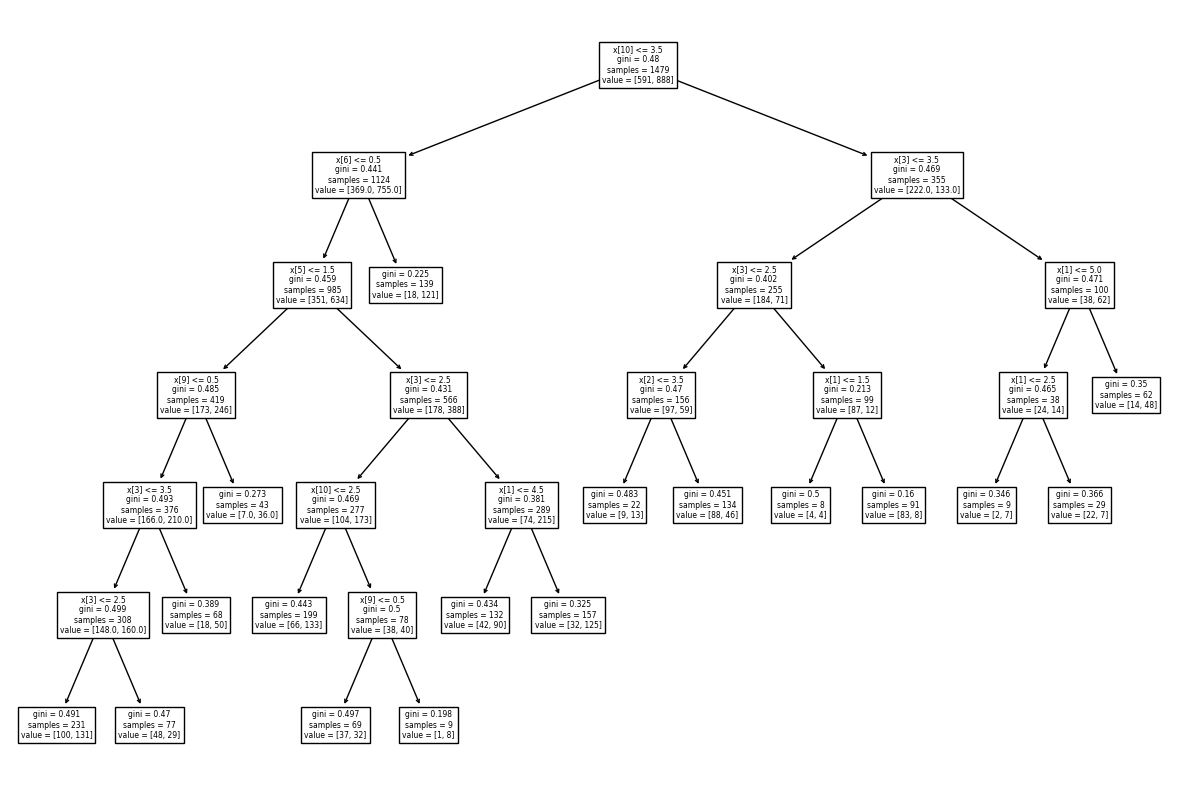

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7 ],
    'max_leaf_nodes' : [7, 9, 11, 13, 15, 17],
    'min_samples_split': [ 3, 5, 7, 10],
    'min_samples_leaf': [ 1, 3, 5, 7],
    'max_features': [None, 'sqrt'],
    'criterion': ['gini', 'entropy']
    # ,    # 'random_state' : [1]
}

# Create decision tree classifier
clf = DecisionTreeClassifier()

# Perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
print('-'*50)

# test decison tree
best_param = grid_search.best_params_
Dtree_grid_best = DecisionTreeClassifier(criterion = best_param['criterion'],
                                         max_depth = best_param['max_depth'],
                                         max_features = best_param['max_features'],
                                         max_leaf_nodes = best_param['max_leaf_nodes'],
                                         min_samples_leaf = best_param['min_samples_leaf'],
                                         min_samples_split = best_param['min_samples_split']
                                        #  ,random_state = best_param['random_state']
                                         )

Dtree_grid_best.fit(X_train,y_train)

_, ax = plt.subplots(figsize=(15,10))
tree.plot_tree(Dtree_grid_best);

y_grid_best_predict = Dtree_grid_best.predict(X_test)

acc = accuracy_score(y_test, y_grid_best_predict)

print('-'*50)
print('test accuracy : ', acc)
print('-'*50)


In [66]:
best_param = grid_search.best_params_
best_param

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': 17,
 'min_samples_leaf': 7,
 'min_samples_split': 3}

## Dtree

prepare for train and test

In [67]:
np.random.seed(seed=1)

In [68]:
a = np.random.randint(2, size=len(clean_data))

In [69]:
a

array([1, 1, 0, ..., 1, 1, 1])

In [70]:
train = clean_data[a == 1]
train.shape

(910, 12)

In [71]:
test = clean_data[a == 0]
test.shape

(939, 12)

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
tree_x_train = train.iloc[:,:-1]

In [74]:
tree_y_train = train.iloc[:,-1]

In [75]:
tree_x_train

,a1,a5,a81,a91,J5new,v1,x1,x2,x3,x4,Gen_group
1,2.0,4.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0
2,2.0,4.0,1.0,5.0,3.0,2.0,1.0,1.0,0.0,0.0,2.0
5,1.0,2.0,1.0,5.0,3.0,2.0,1.0,1.0,1.0,1.0,3.0
6,2.0,3.0,4.0,5.0,2.0,2.0,1.0,1.0,1.0,0.0,3.0
7,1.0,2.0,1.0,5.0,3.0,2.0,1.0,1.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
2053,1.0,1.0,6.0,3.0,1.0,2.0,0.0,0.0,0.0,1.0,3.0
2054,2.0,7.0,6.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0
2056,2.0,4.0,6.0,3.0,1.0,2.0,1.0,0.0,1.0,1.0,3.0
2057,1.0,2.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0


In [76]:
tree_y_train

1       1.0
2       1.0
5       1.0
6       1.0
7       1.0
       ... 
2053    1.0
2054    1.0
2056    1.0
2057    1.0
2058    1.0
Name: q1, Length: 910, dtype: float64

### tree plot

In [77]:
Dtree_tree = DecisionTreeClassifier(criterion='entropy' , max_leaf_nodes = 13)

In [78]:
# Dtree_tree = DecisionTreeClassifier(criterion='entropy', max_depth = 13), max_leaf_nodes = 13

In [79]:
Dtree_tree.fit(tree_x_train,tree_y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=13)

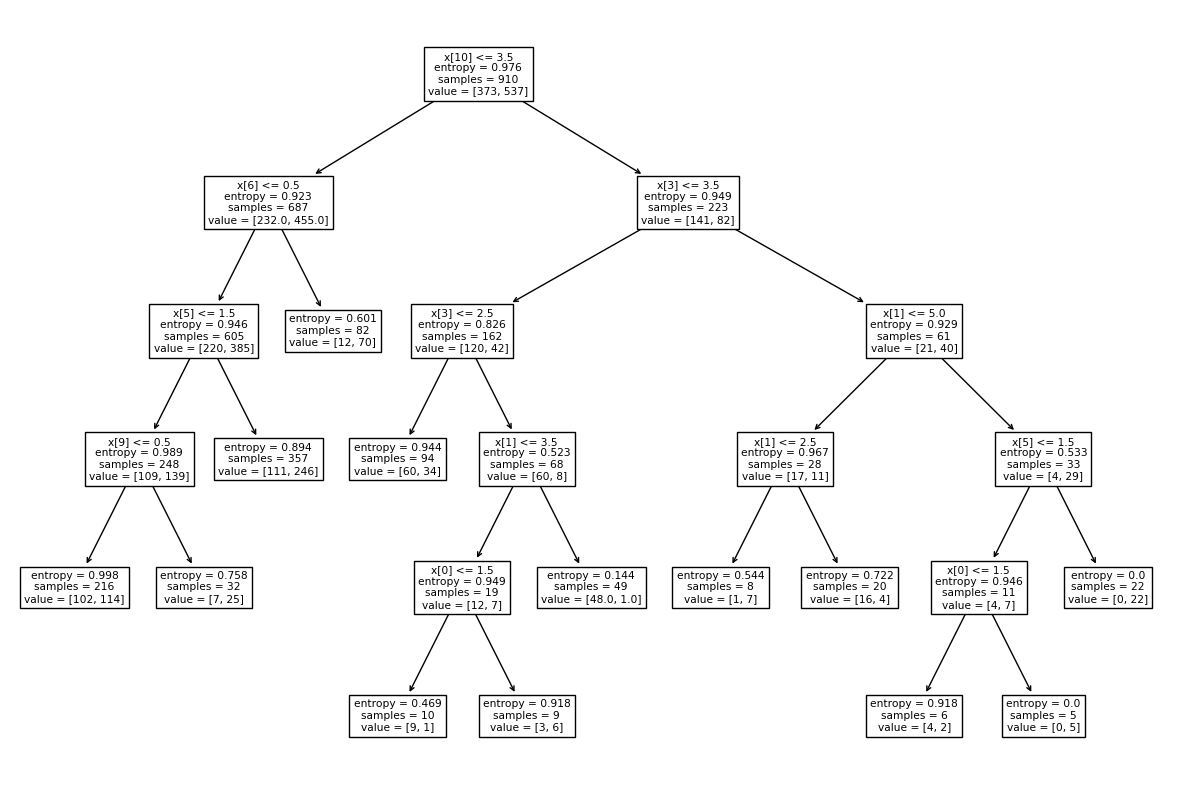

In [80]:
_, ax = plt.subplots(figsize=(15,10))
tree.plot_tree(Dtree_tree);

In [81]:
tree_x_test = test.iloc[:,:-1]
tree_y_test = test.iloc[:,-1]

In [82]:
tree_y_predict = Dtree_tree.predict(tree_x_test)

In [83]:
tree_acc = accuracy_score(tree_y_test, tree_y_predict)

In [84]:
print()
print('-'*50)
print('Accuracy : ', tree_acc)
print('-'*50)


--------------------------------------------------
Accuracy :  0.6773162939297125
--------------------------------------------------


#DT defult parameter

In [85]:
#pip install -I -U scikit-learn

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix

In [87]:
X_train,X_test,y_train,y_test=train_test_split(x_data, y_data, test_size=0.2,shuffle = True,random_state=1)

In [88]:
#ดูจำนวนแถวและคอลัมน์
print(f'Number of X train: {X_train.shape}')
print(f'Number of X test: {X_test.shape}')
print(f'Number of y train: {y_train.shape}')
print(f'Number of y test: {y_test.shape}')



Number of X train: (1479, 11)
Number of X test: (370, 11)
Number of y train: (1479,)
Number of y test: (370,)


In [89]:
# Import
from sklearn.tree import DecisionTreeClassifier


# Define
clf = DecisionTreeClassifier(random_state=1)

# Train
clf.fit(X_train,y_train)

# Predict
y_pred=clf.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report
print(f'accuracy = {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred) )

accuracy = 0.7243243243243244
              precision    recall  f1-score   support

         0.0       0.63      0.66      0.65       141
         1.0       0.78      0.76      0.77       229

    accuracy                           0.72       370
   macro avg       0.71      0.71      0.71       370
weighted avg       0.73      0.72      0.73       370



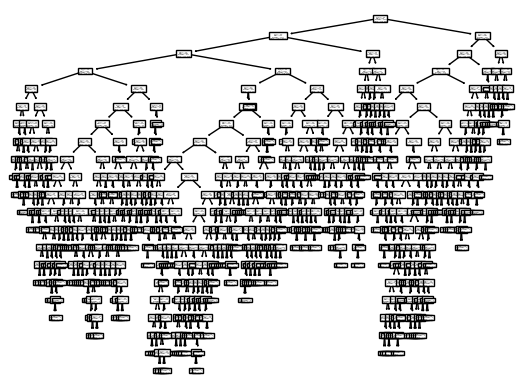

In [90]:
from sklearn import tree
tree.plot_tree(clf);

###10-fold cross validation and find the best parameters

In [91]:
# Define the parameter grid to search over
parameters_dt ={
      'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
      'criterion' : ['gini', 'entropy'],
      #'max_leaf_nodes' : [7, 9, 11, 13,],
      'min_samples_leaf': [2,3,4,5,7,10],
      'min_samples_split': [2,3,4,5,7,10]}

# Define
clf1 = DecisionTreeClassifier(random_state=1)

# Create a GridSearchCV object with 10-fold cross-validation
grid_dt1 =  GridSearchCV(estimator=clf1,
                           param_grid=parameters_dt,
                           cv=10, n_jobs=-1, scoring = "accuracy")
# Fit the grid search object to the data // หาพารามิเตอร์ที่ดีที่สุด เเล้วใช้  cross-va

In [92]:
%%time
# Fit the GridSearchCV object to the training data
grid_dt1.fit(X_train, y_train)
# Print the best hyperparameters
print("Best hyperparameters: ", grid_dt1.best_params_)

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 7}
CPU times: user 4.28 s, sys: 229 ms, total: 4.51 s
Wall time: 45.5 s


test accuracy :  0.672972972972973


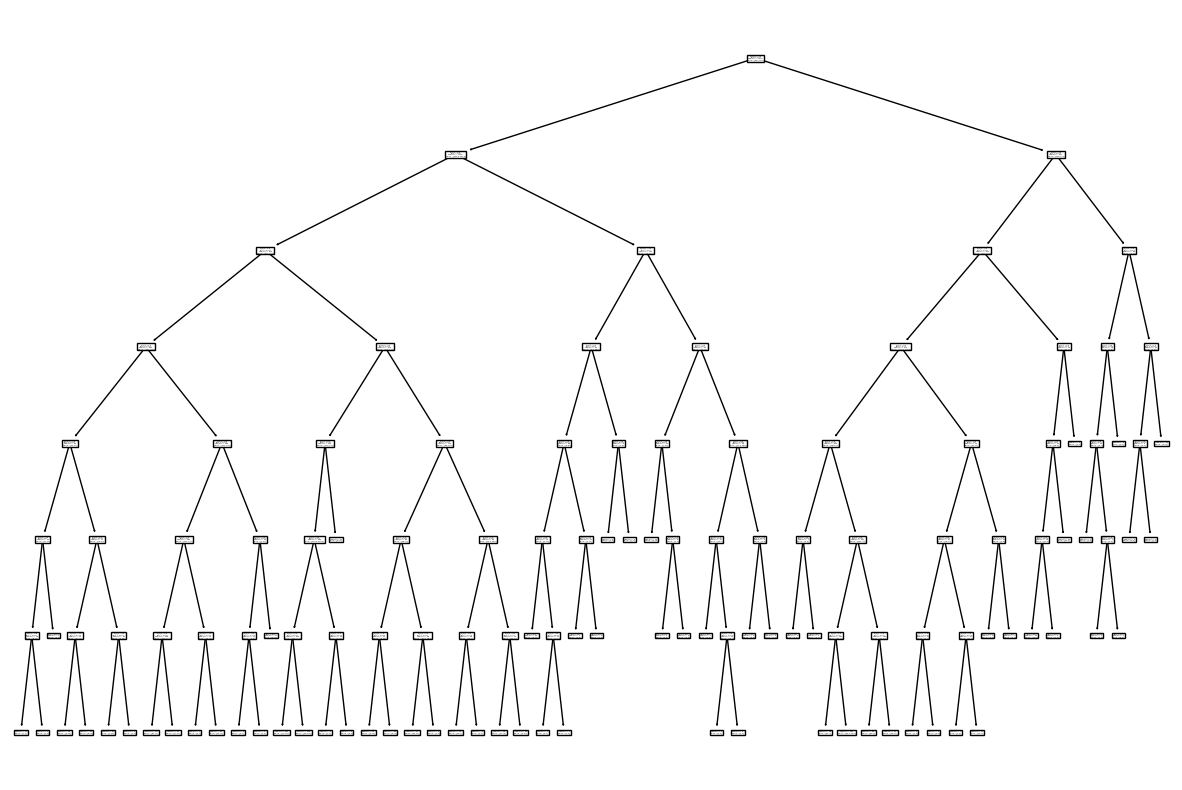

In [93]:
# test decison tree
best_param = grid_dt1.best_params_
Dtree_grid_best = DecisionTreeClassifier(criterion = best_param['criterion'],
                                         max_depth = best_param['max_depth'],
                                         #max_features = best_param['max_features'],
                                         #max_leaf_nodes = best_param['max_leaf_nodes'],
                                         min_samples_leaf = best_param['min_samples_leaf'],
                                         min_samples_split = best_param['min_samples_split']
                                        #  ,random_state = best_param['random_state']
                                         )

Dtree_grid_best.fit(X_train,y_train)

_, ax = plt.subplots(figsize=(15,10))
tree.plot_tree(Dtree_grid_best);

y_grid_best_predict = Dtree_grid_best.predict(X_test)

acc = accuracy_score(y_test, y_grid_best_predict)

print('test accuracy : ', acc)


In [94]:
print("Best score:", grid_dt1.best_score_)

Best score: 0.6802077587791875


###Train DecisionTree model

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score,recall_score

In [96]:
# Define decision tree classifier //กำหนดพารามิเตอร์จาก grid_dt1.best_params_
dt_clf1 = DecisionTreeClassifier(criterion = 'gini',
                            max_depth=7,
                            min_samples_leaf=3,
                            min_samples_split=7,
                            random_state=1)
# Train
dt_clf1.fit(X_train, y_train)

# Predict
y_pred = dt_clf1.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report
print(f'accuracy = {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred) )

accuracy = 0.6702702702702703
              precision    recall  f1-score   support

         0.0       0.58      0.47      0.52       141
         1.0       0.71      0.79      0.75       229

    accuracy                           0.67       370
   macro avg       0.65      0.63      0.63       370
weighted avg       0.66      0.67      0.66       370



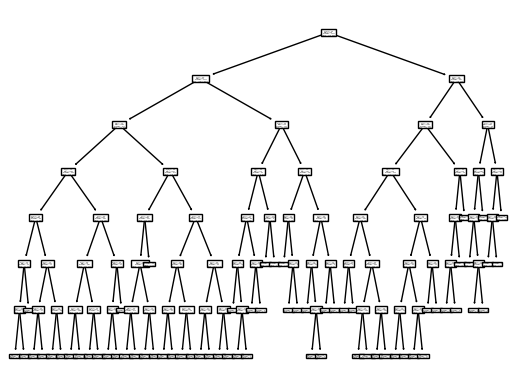

In [97]:
from sklearn.tree import plot_tree
plot_tree(dt_clf1);

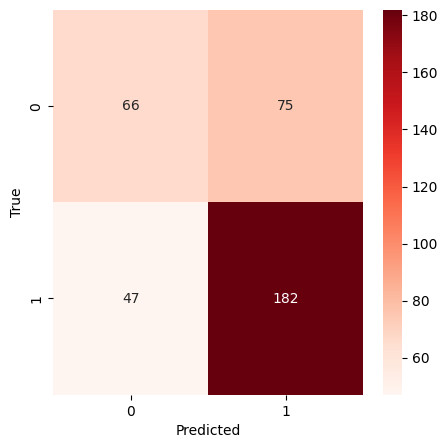

In [98]:
# confusion_matrix ดูว่าโมเดลทำนายเป็นยังไงบ้าง
cm1 = confusion_matrix(y_test, dt_clf1.predict(X_test))

import matplotlib.pyplot as plt
plt.figure(figsize=[5,5])
sns.heatmap(cm1, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

###10-fold cross validation and find the best parameters (recall)

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score,f1_score

In [100]:
# Define the parameter grid to search over
parameters_dt ={
      'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
      'criterion' : ['gini', 'entropy'],
      'min_samples_leaf': [2,3,4,5,7,10],
      'min_samples_split': [2,3,4,5,7,10]}

# Define
clf2 = DecisionTreeClassifier(random_state=1)

# Create a GridSearchCV object with 10-fold cross-validation
grid_dt2 =  GridSearchCV(estimator=clf2,
                           param_grid=parameters_dt,
                           cv=10, n_jobs=-1, scoring = "recall")

In [101]:
%%time
# Fit the GridSearchCV object to the training data
grid_dt2.fit(X_train, y_train)
# Print the best hyperparameters
print("Best hyperparameters: ", grid_dt2.best_params_)

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}
CPU times: user 4.23 s, sys: 200 ms, total: 4.43 s
Wall time: 51.1 s


In [102]:
print("Best score:", grid_dt2.best_score_)

Best score: 0.8871041879468846


###Train DecisionTree model with recall

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score,recall_score

In [104]:
# Define decision tree classifier //กำหนดพารามิเตอร์จาก grid_dt2.best_params_
dt_clf2 = DecisionTreeClassifier(criterion = 'gini',
                            max_depth=2,
                            min_samples_leaf=2,
                            min_samples_split=2,
                            random_state=1)
#Train
dt_clf2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_clf2.predict(X_test)

# Evaluate the recall of the classifier
print(f'recall = {recall_score(y_test, y_pred)}')
print(classification_report(y_test,y_pred))

recall = 0.8864628820960698
              precision    recall  f1-score   support

         0.0       0.63      0.32      0.42       141
         1.0       0.68      0.89      0.77       229

    accuracy                           0.67       370
   macro avg       0.66      0.60      0.60       370
weighted avg       0.66      0.67      0.64       370



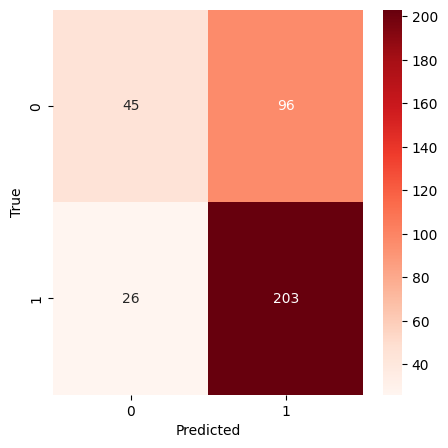

In [105]:
# confusion_matrix
cm2 = confusion_matrix(y_test, dt_clf2.predict(X_test))

import matplotlib.pyplot as plt
plt.figure(figsize=[5,5])
sns.heatmap(cm2, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

###Train DecisionTree model with recall (2) (Random)

In [106]:
parameters ={
      'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
      'criterion' : ['gini', 'entropy'],
      'min_samples_leaf': [2,3,4,5,7,10],
      'min_samples_split': [2,3,4,5,7,10]}

In [107]:
from sklearn.model_selection import RandomizedSearchCV
# RandomSearch จะทำการสุ่มเลือกค่าพารามิเตอร์จากกริดที่สร้างขึ้น
#ดังนั้นการทำ Random Search จะไม่รับประกันว่าเราจะได้โมเดลที่มีประสิทธิภาพที่สุดเหมือนกับ Grid Search แต่วิธีมีประสิทธิภาพสูงในการใช้งานจริงเนื่องจากใช้เวลาในการสร้างโมเดลที่น้อยมาก
clf3 = DecisionTreeClassifier(random_state=1)
model = RandomizedSearchCV(estimator = clf3, param_distributions = parameters, n_iter = 100, cv = 10, random_state= 1, n_jobs = -1,scoring = "recall")
model.fit(X_train,y_train)
predictionDT = model.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionDT))
print(classification_report(y_test,predictionDT))
acc4 = recall_score(y_test,predictionDT)

[[ 45  96]
 [ 26 203]]
              precision    recall  f1-score   support

         0.0       0.63      0.32      0.42       141
         1.0       0.68      0.89      0.77       229

    accuracy                           0.67       370
   macro avg       0.66      0.60      0.60       370
weighted avg       0.66      0.67      0.64       370



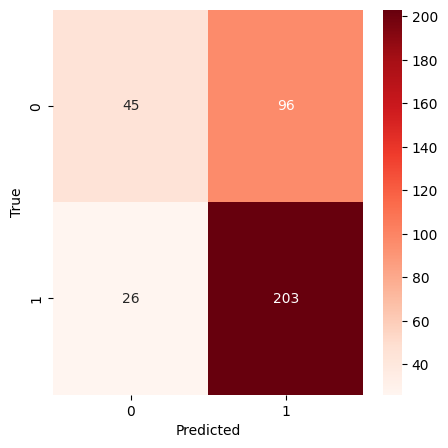

In [108]:
# confusion_matrix
cm3 = confusion_matrix(y_test, model.predict(X_test))

import matplotlib.pyplot as plt
plt.figure(figsize=[5,5])
sns.heatmap(cm3, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#NaiveBayes

###10-fold cross validation and find the best parameters (acc)

In [109]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold,train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score

In [110]:
# Define the parameter grid to search over
parameters_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create a Naive Bayes classifier object
nb1 = GaussianNB()


# Create a GridSearchCV object with 10-fold cross-validation
grid_nb1 = GridSearchCV(estimator=nb1,
                           param_grid=parameters_nb,
                           cv=10, n_jobs=-1,scoring = "accuracy")

In [111]:
%%time
# Fit the GridSearchCV object to the training data
grid_nb1.fit(X_train, y_train)
# Print the best hyperparameters
print("Best hyperparameters: ", grid_nb1.best_params_)

Best hyperparameters:  {'var_smoothing': 1e-09}
CPU times: user 87.6 ms, sys: 4.03 ms, total: 91.6 ms
Wall time: 311 ms


###Train NaiveBayes model (acc)

In [112]:
# Create a Gaussian Naive Bayes classifier
model_nb1 = GaussianNB(var_smoothing = 1e-09)

# Train the model on the training set
model_nb1.fit(X_train, y_train)

# Predict
y_pred = model_nb1.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report
print(f'accuracy = {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

accuracy = 0.5459459459459459
              precision    recall  f1-score   support

         0.0       0.45      0.89      0.60       141
         1.0       0.83      0.34      0.48       229

    accuracy                           0.55       370
   macro avg       0.64      0.61      0.54       370
weighted avg       0.68      0.55      0.52       370



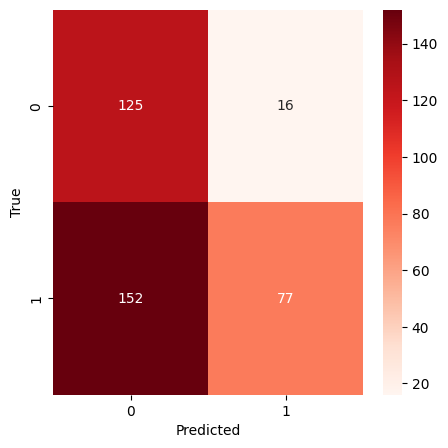

In [113]:
# confusion_matrix
cm4 = confusion_matrix(y_test, model_nb1.predict(X_test))

import matplotlib.pyplot as plt
plt.figure(figsize=[5,5])
sns.heatmap(cm4, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

###10-fold cross validation and find the best parameters (recall)

In [114]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold,train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score

In [115]:
# Define the parameter grid to search over
parameters_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create a Naive Bayes classifier object
nb2 = GaussianNB()


# Create a GridSearchCV object with 10-fold cross-validation
grid_nb2 = GridSearchCV(estimator=nb2,
                           param_grid=parameters_nb,
                           cv=10, n_jobs=-1,scoring = "recall")

In [116]:
%%time
# Fit the GridSearchCV object to the data
grid_nb2.fit(X_train, y_train)
# Print the best hyperparameters
print("Best hyperparameters: ", grid_nb2.best_params_)

Best hyperparameters:  {'var_smoothing': 1e-05}
CPU times: user 86.8 ms, sys: 4.12 ms, total: 90.9 ms
Wall time: 401 ms


###Train NaiveBayes model (recall)

In [117]:
# Create a Gaussian Naive Bayes classifier
model_nb2 = GaussianNB(var_smoothing = 1e-05)

# Train the model on the training set
model_nb2.fit(X_train, y_train)

#predict
y_pred = model_nb2.predict(X_test)

#Evaluation
from sklearn.metrics import recall_score, classification_report
print(f'recall = {recall_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

recall = 0.34497816593886466
              precision    recall  f1-score   support

         0.0       0.45      0.87      0.59       141
         1.0       0.81      0.34      0.48       229

    accuracy                           0.55       370
   macro avg       0.63      0.61      0.54       370
weighted avg       0.68      0.55      0.53       370



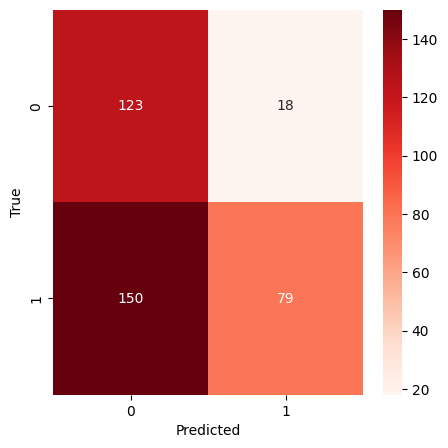

In [118]:
# confusion_matrix
cm42 = confusion_matrix(y_test, model_nb2.predict(X_test))

import matplotlib.pyplot as plt
plt.figure(figsize=[5,5])
sns.heatmap(cm42, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

###รวม โมเดล DT , NB

In [119]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB

In [120]:
dt_clf1 = DecisionTreeClassifier(criterion = 'gini',max_depth=7,min_samples_leaf=3,min_samples_split=7,random_state=1)
scores = cross_val_score(dt_clf1, X_train, y_train, cv=10)
print('Mean cross-validation score: DecisionTree_max_depth=7', scores.mean())
#4
dt_clf2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=2,min_samples_leaf=2,min_samples_split=2,random_state=1)
scores = cross_val_score(dt_clf2, X_train, y_train, cv=10)
print('Mean cross-validation score: DecisionTree_max_depth=2', scores.mean())
#5
model_nb1 = GaussianNB(var_smoothing = 1e-05)
scores = cross_val_score(model_nb1, X_train, y_train, cv=10)
print('Mean cross-validation score: var_smoothing1e-09', scores.mean())
#6
model_nb2 = GaussianNB(var_smoothing = 1e-09)
scores = cross_val_score(model_nb2, X_train, y_train, cv=10)
print('Mean cross-validation score: var_smoothing1e-05', scores.mean())

Mean cross-validation score: DecisionTree_max_depth=7 0.6802077587791875
Mean cross-validation score: DecisionTree_max_depth=2 0.6740899062327632
Mean cross-validation score: var_smoothing1e-09 0.545647177790035
Mean cross-validation score: var_smoothing1e-05 0.545647177790035


###เทรนโมเดล acc

In [121]:
# Define decision tree classifier //กำหนดพารามิเตอร์จาก grid_dt1.best_params_
dt_clf1 = DecisionTreeClassifier(criterion = 'gini',
                            max_depth=7,
                            min_samples_leaf=3,
                            min_samples_split=7,
                            random_state=1)
# Train
dt_clf1.fit(X_train, y_train)

# Predict
y_pred = dt_clf1.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report
print(f'accuracy = {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred) )

accuracy = 0.6702702702702703
              precision    recall  f1-score   support

         0.0       0.58      0.47      0.52       141
         1.0       0.71      0.79      0.75       229

    accuracy                           0.67       370
   macro avg       0.65      0.63      0.63       370
weighted avg       0.66      0.67      0.66       370



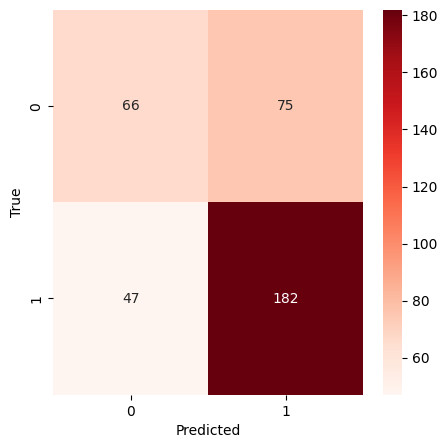

In [122]:
# confusion_matrix
cm1 = confusion_matrix(y_test, dt_clf1.predict(X_test))

import matplotlib.pyplot as plt
plt.figure(figsize=[5,5])
sns.heatmap(cm1, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [123]:
dt_clf1 = DecisionTreeClassifier(criterion = 'gini',max_depth=7,min_samples_leaf=3,min_samples_split=7,random_state=1)

dt_clf2 = DecisionTreeClassifier(criterion = 'gini',max_depth=2,min_samples_leaf=2,min_samples_split=2,random_state=1)

model_nb1 = GaussianNB(var_smoothing = 1e-05)

model_nb2 = GaussianNB(var_smoothing = 1e-09)


dt1 = cross_val_score(dt_clf1, X_train, y_train, cv=10, scoring='accuracy')
dt2 = cross_val_score(dt_clf2, X_train, y_train, cv=10, scoring='accuracy')
nb1 = cross_val_score(model_nb1, X_train, y_train, cv=10, scoring='accuracy')
nb2 = cross_val_score(model_nb2, X_train, y_train, cv=10, scoring='accuracy')


# Print the mean recall scores for each model
print("Decision Tree1 accuracy score:",dt1.mean())
print("Decision Tree2 accuracy score:", dt2.mean())
print("Naive Bayes1 accuracy score:", nb1.mean())
print("Naive Bayes2 accuracy score:", nb2.mean())


Decision Tree1 accuracy score: 0.6802077587791875
Decision Tree2 accuracy score: 0.6740899062327632
Naive Bayes1 accuracy score: 0.545647177790035
Naive Bayes2 accuracy score: 0.545647177790035


### เทรน โมเดล recall

In [124]:
model_nb2 = GaussianNB(var_smoothing = 1e-09)
model_nb2.fit(X_train,y_train)
y_pred = model_nb2.predict(X_test)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
# Print f1 score
print("Recall score: ", recall)
# Print the accuracy score
print("Accuracy score: ", accuracy)

Recall score:  0.33624454148471616
Accuracy score:  0.5459459459459459


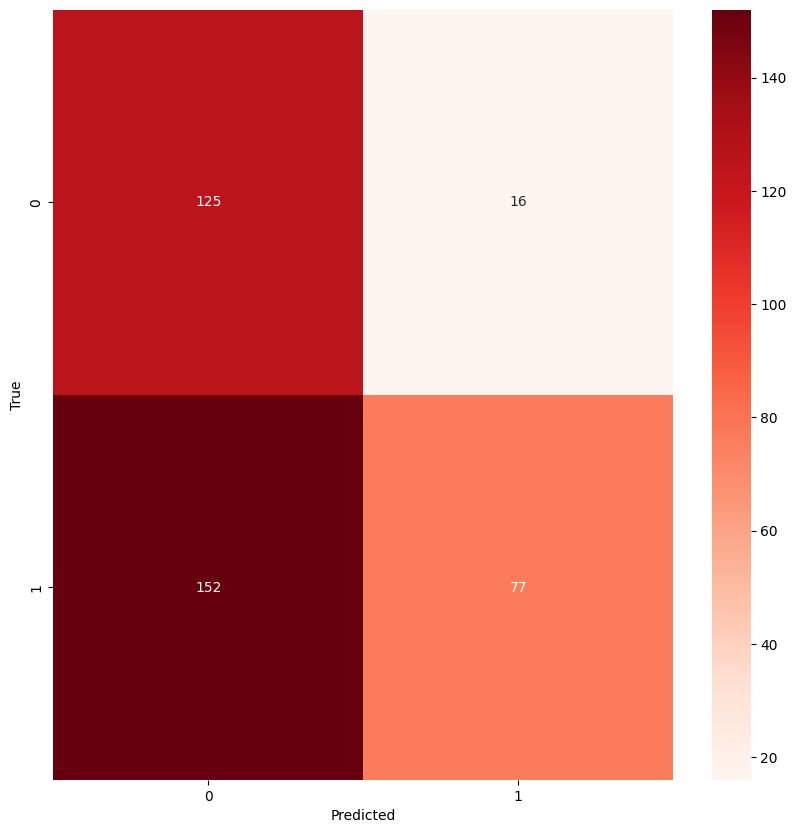

In [125]:
cm8 = confusion_matrix(y_test, model_nb2.predict(X_test))

import matplotlib.pyplot as plt
plt.figure(figsize=[10,10])
sns.heatmap(cm8, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [126]:
model_nb1 = GaussianNB(var_smoothing = 1e-05)
model_nb1.fit(X_train,y_train)
y_pred = model_nb1.predict(X_test)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
# Print f1 score
print("Recall score: ", recall)
# Print the accuracy score
print("Accuracy score: ", accuracy)

Recall score:  0.34497816593886466
Accuracy score:  0.5459459459459459


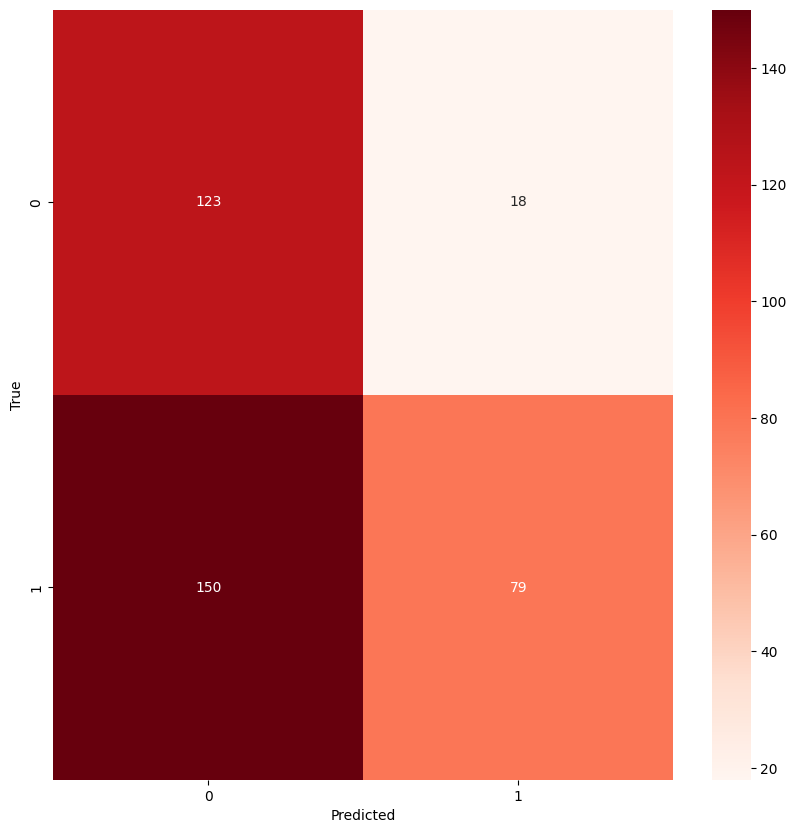

In [127]:
cm9 = confusion_matrix(y_test, model_nb1.predict(X_test))

import matplotlib.pyplot as plt
plt.figure(figsize=[10,10])
sns.heatmap(cm9, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [134]:
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [ ]:
# the model must be fitted before hand, otherwise it will complain here
cm = ConfusionMatrix(fitted_model)

# now we can generate different plot with the same model using whatever dataset/setting we want...
fig, axs = plt.subplot(3, 1)
cm.plot(x_test1, y_test1, ax=axs[0])
cm.plot(x_test2, y_test2, cmap='viridis', show_subtotals=False, ax=axs[1])
cm.plot(x_test3, y_test3, normalize='pred', show_values='percent', ax=axs[2])

#Association

In [130]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
